#  Testing stan models

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pystan 
import pandas 
import sys
sys.path.insert(0, '../../')
import mwc.viz
import mwc.stats
import mwc.bayes
colors = mwc.viz.personal_style()
%matplotlib inline

## Exponential growth 

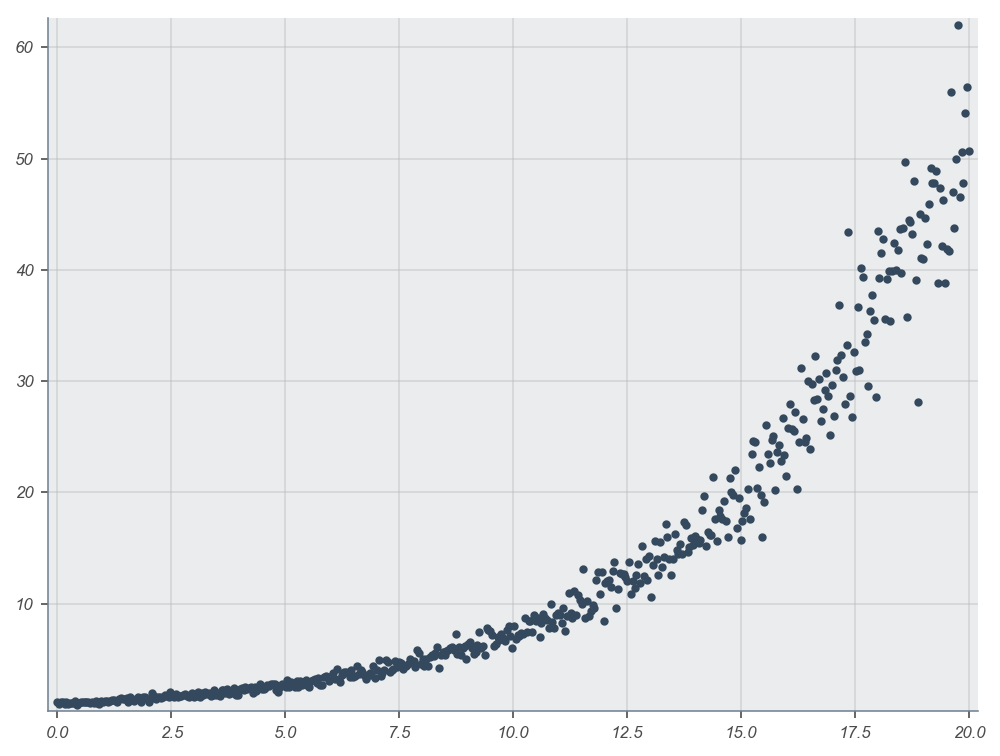

In [18]:
# set the constants.
k = 0.2
a0 = 1
time = np.linspace(0, 20, 500)
mu = a0 * np.exp(k * time)
a_t = np.random.normal(mu, 0.1 * mu)
plt.plot(time, a_t,  '.')


In [51]:
# Define the stan model
model = """
data {
   int<lower=0> N;
   vector[N] absorb;
   vector[N] time;
    }
parameters {
    real<lower=0> k;
    real<lower=0> a0;
    real sigma;
    }
model {
    vector[N] mu;
    mu = a0 * exp(k * time);
    k ~ normal(0, 1);
    sigma ~ normal(0, 1);
    a0 ~ normal(0, 1);
    absorb[N] ~ normal(mu, sigma);
    }
"""
sm = pystan.StanModel(model_code=model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_d42802349631d3e7b2ee6ecec5f051f0 NOW.


In [52]:
dat = {'time':time, 'absorb':a_t, 'N':len(time)}
fit = sm.sampling(data=dat, iter=5000, chains=4)

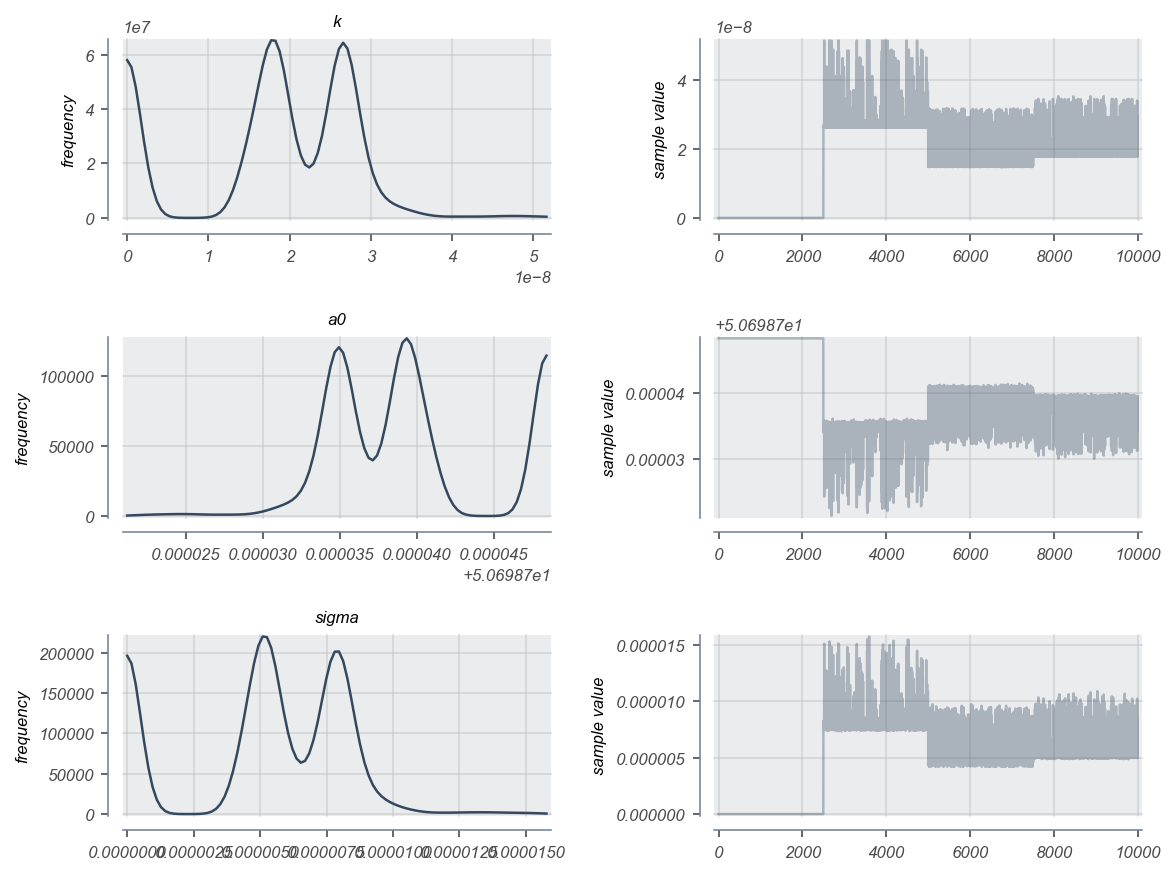

In [53]:
_ = fit.plot()
mwc.viz.format_axes()
plt.tight_layout()